In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
data= pd.read_csv("/content/Parkinsson disease.csv")

In [ ]:
about_list = ["ASCII subject name and recording number",
              "Average vocal fundamental frequency",
              "Maximum vocal fundamental frequency",
              "Minimum vocal fundamental frequency" ,
              "Measure of variation in fundamental frequency",
              "Measure of variation in fundamental frequency",
              "Measure of variation in fundamental frequency",
              "Measure of variation in fundamental frequency",
              "Measure of variation in fundamental frequency",
              "Measures of variation in amplitude",
              "Measures of variation in amplitude",
              "Measures of variation in amplitude",
              "Measures of variation in amplitude",
              "Measures of variation in amplitude",
              "Measures of variation in amplitude",
              "Measures of ratio of noise to tonal components in the voice",
              "Measures of ratio of noise to tonal components in the voice",
              "Health status of the subject (one) - Parkinson's, (zero) - healthy",
              "Two nonlinear dynamical complexity measures",
              "Two nonlinear dynamical complexity measures",
              "Signal fractal scaling exponent" ,
              "Nonlinear measures of fundamental frequency variation",
              "Nonlinear measures of fundamental frequency variation",
              "Nonlinear measures of fundamental frequency variation"]

In [ ]:
about = pd.DataFrame({"Names":data.columns, "Description":about_list})
about

In [ ]:
about_list = ["ASCII subject name and recording number",
              "Average vocal fundamental frequency",
              "Maximum vocal fundamental frequency",
              "Minimum vocal fundamental frequency" ,
              "Measure of variation in fundamental frequency",
              "Measure of variation in fundamental frequency",
              "Measure of variation in fundamental frequency",
              "Measure of variation in fundamental frequency",
              "Measure of variation in fundamental frequency",
              "Measures of variation in amplitude",
              "Measures of variation in amplitude",
              "Measures of variation in amplitude",
              "Measures of variation in amplitude",
              "Measures of variation in amplitude",
              "Measures of variation in amplitude",
              "Measures of ratio of noise to tonal components in the voice",
              "Measures of ratio of noise to tonal components in the voice",
              "Health status of the subject (one) - Parkinson's, (zero) - healthy",
              "Two nonlinear dynamical complexity measures",
              "Two nonlinear dynamical complexity measures",
              "Signal fractal scaling exponent" ,
              "Nonlinear measures of fundamental frequency variation",
              "Nonlinear measures of fundamental frequency variation",
              "Nonlinear measures of fundamental frequency variation"]

In [ ]:
len(about_list)

In [ ]:
# about[]

In [ ]:
data.info()

In [ ]:
data.head(10)

In [ ]:
attributes = data.columns[:23]

In [ ]:
# sns.set(style = "darkgrid")
# sns.distplot(data, bins=23, color='b', kde = True )

In [ ]:
# data.hist(subplots= True, layout=(8, 3), figsize = (13, 18), legend= False)
# plt.tight_layout()

In [ ]:
data.isnull().sum()

In [ ]:
(data["status"] == 1).sum()

In [ ]:
(data["status"] == 0).sum()

In [ ]:
data.drop(columns="name", inplace=True)

In [ ]:
data.info()

In [ ]:
data.status.value_counts()

In [ ]:
for i in range(0, 22, 1):
  print(f"The column {i} named as {data.columns[i]} have {len(data.iloc[:, i].unique())} unique values")

In [ ]:
l=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(0, 22, 1):
  l[i] = len(data.iloc[:, i].unique())

In [ ]:
plt.scatter(l, np.arange(1, 23))
plt.title("Unique values in the dataset per attribute", fontsize=(14))
plt.xlabel("Number of unique values", fontsize=(12))
plt.ylabel("Column Number", fontsize=(12))


In [ ]:
X=data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21]]
y=data.iloc[:, [16]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = MinMaxScaler().fit(X_train)
print(scaler)

In [ ]:
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [ ]:
# set the random seed
tf.random.set_seed(42)

# creating the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Creating a callback
lr_c = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 *(10**(epoch/20)))

# compiling the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer="Adam",
              metrics=["accuracy"])

# fit the model
history = model.fit(X_train_norm, y_train, epochs=300, callbacks=[lr_c], verbose=1)

Epoch 1/300
5/5 [==============================] - 1s 5ms/step - loss: 0.9903 - accuracy: 0.2628 - lr: 1.0000e-04
Epoch 2/300
5/5 [==============================] - 0s 4ms/step - loss: 0.9506 - accuracy: 0.2628 - lr: 1.1220e-04
Epoch 3/300
5/5 [==============================] - 0s 3ms/step - loss: 0.9089 - accuracy: 0.2628 - lr: 1.2589e-04
Epoch 4/300
5/5 [==============================] - 0s 3ms/step - loss: 0.8657 - accuracy: 0.2628 - lr: 1.4125e-04
Epoch 5/300
5/5 [==============================] - 0s 3ms/step - loss: 0.8200 - accuracy: 0.2692 - lr: 1.5849e-04
Epoch 6/300
5/5 [==============================] - 0s 4ms/step - loss: 0.7738 - accuracy: 0.2949 - lr: 1.7783e-04
Epoch 7/300
5/5 [==============================] - 0s 3ms/step - loss: 0.7287 - accuracy: 0.4103 - lr: 1.9953e-04
Epoch 8/300
5/5 [==============================] - 0s 3ms/step - loss: 0.6867 - accuracy: 0.5897 - lr: 2.2387e-04
Epoch 9/300
5/5 [==============================] - 0s 3ms/step - loss: 0.6436 - accuracy

In [ ]:
model.evaluate(X_test_norm, y_test)

2/2 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.1795


[nan, 0.1794871836900711]

In [ ]:
model.summary()

In [ ]:
X_test.shape, y_test.shape

<Axes: >

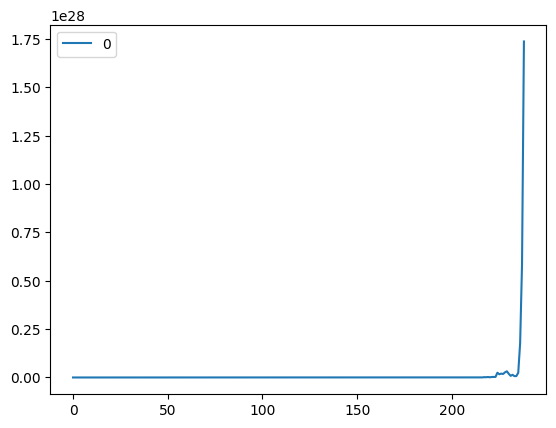

In [ ]:
pd.DataFrame(history.history["loss"]).plot()

In [ ]:
lrs = 1e-4 *(10**(tf.range(300)/20))

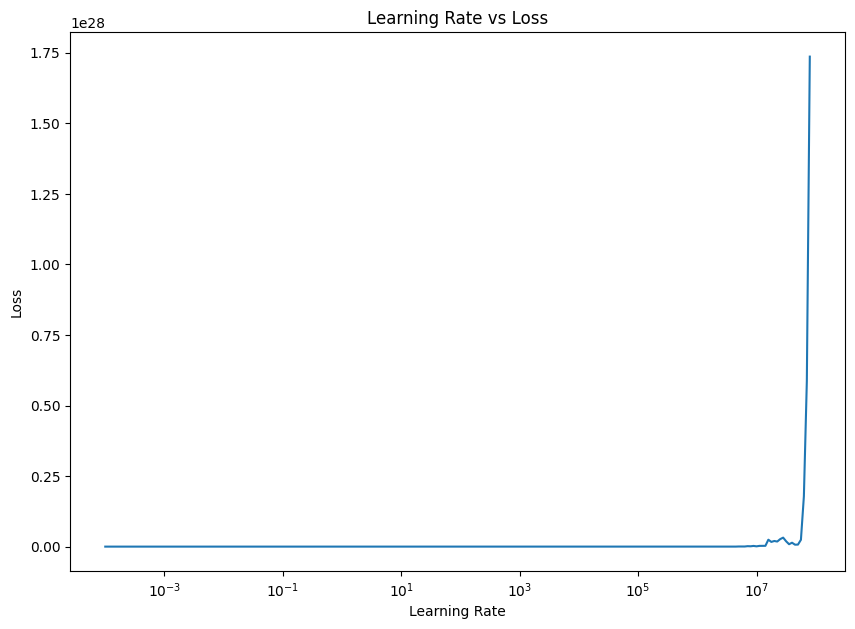

In [ ]:
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss");

In [ ]:
y_train.shape, X_train_norm.shape

((156, 1), (156, 21))

In [ ]:
# Creating a model with ideal learningrate

# Setting the random seed
tf.random.set_seed(42)

# Creating the model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
# Compile the model
model_1.compile(loss="BinaryCrossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                metrics=["accuracy"])
# Fit the training data into the model
history_1 = model_1.fit(X_train_norm, y_train, epochs= 50, verbose=1, validation_data=(X_test_norm, y_test))

In [ ]:
model_1.evaluate(X_test_norm, y_test)[1]*100

In [ ]:
pd.DataFrame(history_1.history).plot()
plt.title("Graph showing the loss and accuracy curves")
plt.xlabel("Number of epochs")

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model = model_1)

In [ ]:
model_1.summary()

In [ ]:
data.info()

In [ ]:
X_train_norm.shape, y_train.shape

In [ ]:
y_preds = tf.squeeze(tf.round(model_1.predict(X_test_norm)))

In [ ]:
tf.unique(y_preds)

In [ ]:
cfg = confusion_matrix(y_preds, y_test)
cfg

In [ ]:
sns.heatmap((cfg/np.sum(cfg)),
            fmt="0.2%",
            annot=True,
            cmap = "Blues",
            xticklabels = (0, 1),
            yticklabels = [0, 1]
            )
plt.title("Confusion_matrix", fontsize=20)
plt.xlabel("Predicted Values", fontsize=20)
plt.ylabel("Actual/ True Values", fontsize=20)

In [ ]:
tf.squeeze(y_preds[:10])

In [ ]:
y_test[:10]

In [ ]:
X_test_norm, y_test

In [ ]:
model_1.summary()

In [ ]:
len(y_test), len(y_preds)

In [ ]:
y_test.shape, y_preds.shape

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), cmap="Blues", annot=True)

## Now using the machine learning algorithms to find the status of the patient

### SVM


In [ ]:
from sklearn.svm import SVC
model_2 = SVC()
model_2.fit(X_train_norm, y_train)
print("Accuracy: ", model_2.score(X_test_norm, y_test)*100)

# accuracy_2 = model_2.score(X_test_norm, y_test)

### Gaussian naive bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB
model_3 = GaussianNB()
model_3.fit(X_train_norm, y_train)
print("Accuracy: ", model_3.score(X_test_norm, y_test)*100)
model_3.predict(X_test_norm)

### Desision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_4 = DecisionTreeClassifier()
model_4.fit(X_train_norm, y_train)
print("Accuracy: ", model_4.score(X_test_norm, y_test)*100, "%")

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model_5 = LogisticRegression()
model_5.fit(X_train_norm, y_train)
print("Accuracy: ", model_5.score(X_test_norm, y_test)*100)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_6 = RandomForestClassifier()
model_6.fit(X_train_norm, y_train)
print("Accuracy: ", model_6.score(X_test_norm, y_test)*100)

### KNN(k-nearest neighbour)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_7 = KNeighborsClassifier()
model_7.fit(X_train_norm, y_train)
print("Accuracy: ", model_7.score(X_test_norm, y_test)*100)

### XGBoost

In [ ]:
from xgboost import XGBClassifier

model_8 = XGBClassifier()
model_8.fit(X_train_norm, y_train)
print("Accuracy: ", model_8.score(X_test_norm, y_test)*100)

### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model_9 = AdaBoostClassifier()
model_9.fit(X_train_norm, y_train)
print("Accuracy: ", model_9.score(X_test_norm, y_test)*100)

In [ ]:
plt.figure(figsize=(10, 10))
plt.hist(data)
plt.show()

In [ ]:
data

In [ ]:
confusion_matrix(y_test, model_3.predict(X_test_norm))

### Classification report for the data

In [ ]:
y_preds_1 = model_6.predict(X_test_norm)

In [ ]:
y_preds_2 = model_7.predict(X_test_norm)

In [ ]:
y_preds

In [ ]:
y_preds_1

In [ ]:
y_preds_2

In [ ]:
print(classification_report(y_preds, y_test))

In [ ]:
print(classification_report(y_preds_1, y_test))

In [ ]:
print(classification_report(y_preds_2, y_test))

In [ ]:
list_0 = [0.71, 1.00, 0.83, 0.95]

In [ ]:
list_1 = [1.00, 0.94, 0.97, 0.95]

In [ ]:
list = ["precision", "recall", "f1-score", "accuracy"]

In [ ]:
eval = pd.DataFrame([list_0, list_1], columns=list, index = [0, 1])
eval

In [ ]:
 eval.plot(kind = 'bar')

In [ ]:
sns.heatmap((confusion_matrix(y_test, y_preds)/np.sum(confusion_matrix(y_test, y_preds))),
            fmt="0.2%",
            annot=True,
            cmap="Reds")
plt.title("Confusion Matrix for the ANN", fontsize = 15)
plt.xlabel("Predicted Values", fontsize = 14)
plt.ylabel("Actual/ Target Values", fontsize = 14)

In [ ]:
sns.heatmap((confusion_matrix(y_test, y_preds_1)/np.sum(confusion_matrix(y_test, y_preds_1))),
            fmt = "0.2%",
            annot= True,
            cmap = "Greens")
plt.title("Confusion Matrix for Random Forest", fontsize = 15)
plt.xlabel("Predicted Values", fontsize = 14)
plt.ylabel("Actual/ Target Values", fontsize = 14)

In [ ]:
sns.heatmap((confusion_matrix(y_test, y_preds_2)/np.sum(confusion_matrix(y_test, y_preds_2))),
            fmt = "0.2%",
            annot= True,
            cmap = "Blues")
plt.title("Confusion Matrix for the KNN", fontsize = 15)
plt.xlabel("Predicted Values", fontsize = 14)
plt.ylabel("Actual/ Target Values", fontsize = 14)

In [ ]:
print(classification_report(y_preds, y_test))

### Code to save all the models

In [ ]:
# checking he accuracy of all the models
a1 = (model_1.evaluate(X_test_norm, y_test)[1])*100
a2 = model_2.score(X_test_norm, y_test)*100
a3 = model_3.score(X_test_norm, y_test)*100
a4 = model_4.score(X_test_norm, y_test)*100
a5 = model_5.score(X_test_norm, y_test)*100
a6 = model_6.score(X_test_norm, y_test)*100
a7 = model_7.score(X_test_norm, y_test)*100
a8 = model_8.score(X_test_norm, y_test)*100
a9 = model_9.score(X_test_norm, y_test)*100
a1, a2, a3, a4, a5, a6, a7, a8, a9
accuracy = [a1, a2, a3, a4, a5, a6, a7, a8, a9]
alas = np.expand_dims(accuracy, axis=0)
alas= np.squeeze(alas)
# accuracy = np.reshape(accuracy, (1, 9))

In [ ]:
df = pd.DataFrame(accuracy, index= ["ANN", "SVM", "Gaussian Naive Bayes", "Decision Tree", "Logistic Regression", "Random Forest", "KNN","Extreme Gradient Boosting", "Adaboost"], columns=["accuracy/ score"])

In [ ]:
df.plot(kind = "bar", )

In [ ]:
!pip install joblib

In [ ]:
model_1.save("ann9487.h5")
import joblib as jbl

jbl.dump(model_2, "svm8974.pkl")
jbl.dump(model_3, "gnb6923.pkl")
jbl.dump(model_4, "decision8461.pkl")
jbl.dump(model_5, "logistic8974.pkl")
jbl.dump(model_6, "rf9230.pkl")
jbl.dump(model_7, "knn9487.pkl")
jbl.dump(model_8, "xgb9487.pkl")
jbl.dump(model_9, "adb8718.pkl")
